In [1]:
#Importing all the necessary libararies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob

In [2]:
#Creating a dataframe and reading the csv
df = pd.read_csv('netflix_titles.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7983 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [3]:
df.shape   #Checking the number of rows and columns in the data

(8807, 12)

In [4]:
df.head()   #Getting the first five rows of the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Kirsten Johnson, Richard Johnson, Ira Sachs, M...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,various,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,various,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,various,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
print(df.isnull().sum())  #Checking total missing values in the data

show_id           0
type              0
title             0
director          0
cast            824
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64


In [6]:
#Replacing the missing values with Unknown
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)

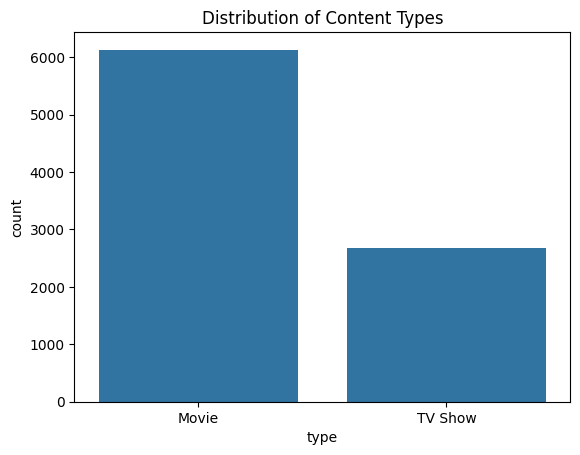

In [7]:
#Visualizing the distribution of Types of Content
sns.countplot(data =df, x='type')
plt.title('Distribution of Content Types')
plt.show()

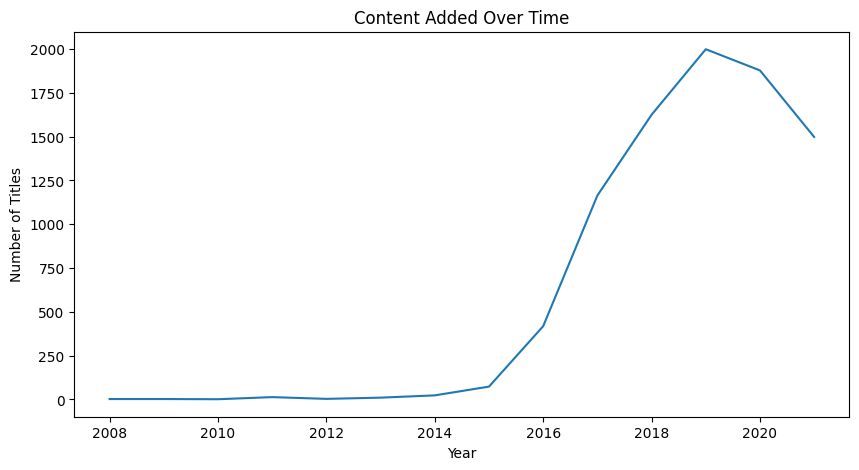

In [8]:
#Visualization of content added over time
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
content_added_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=content_added_per_year)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


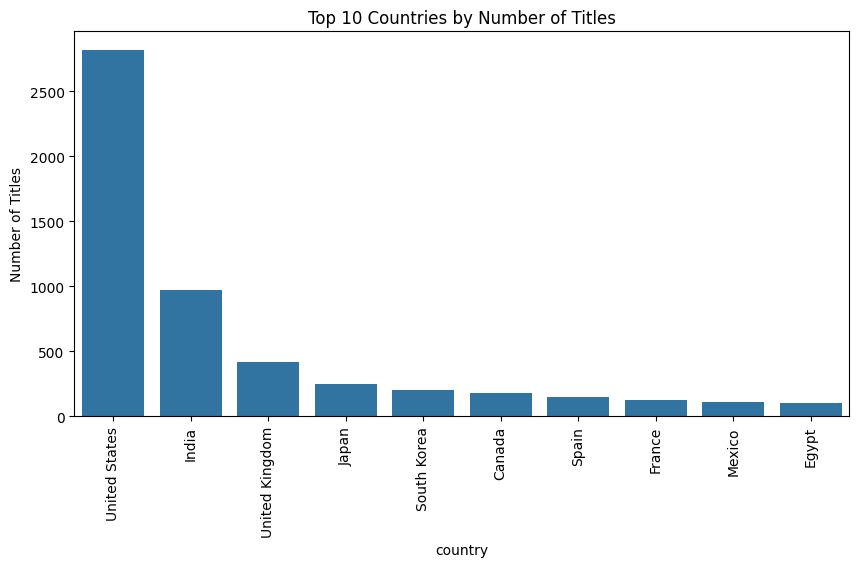

In [17]:
#Visualizing Top 10 Countries by Number of titles
df['country']=df['country'].fillna('Unknown')
df_count = df.explode('country')
df_count = df_count[df_count['country'] != 'Unknown']
country_counts = df_count['country'].value_counts()

top_countries = country_counts.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Titles')
plt.xticks(rotation=90)
plt.ylabel('Number of Titles')
plt.show()


In [18]:
#Piechart based on ratings
x = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(x, values='counts', names='rating', title='Distribution of content ratings on Netflix')
pieChart.show()

<ipython-input-19-fc1ef46cd3dd>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




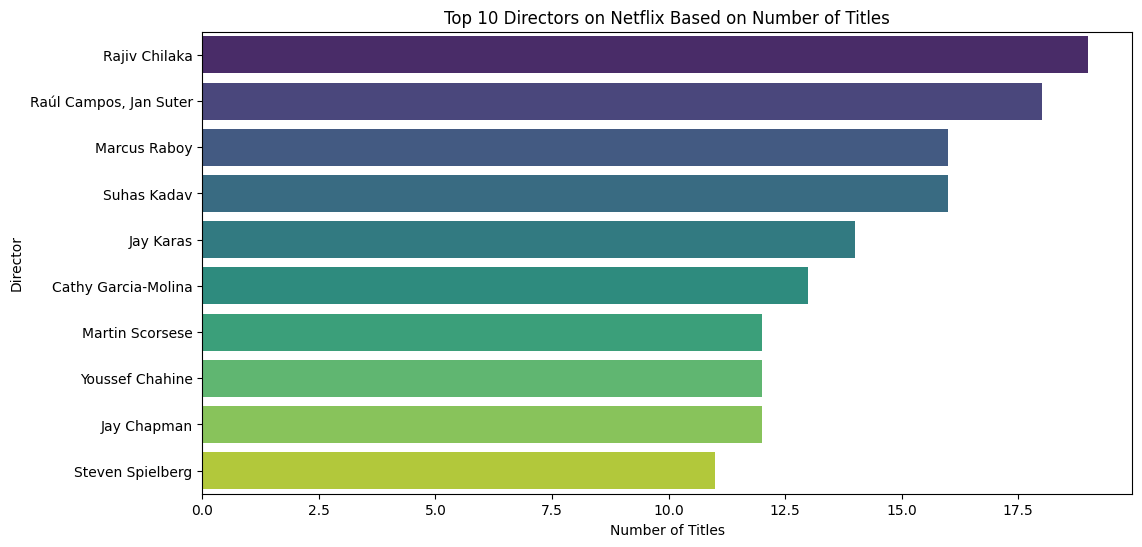

In [19]:
#Displaying Top 10 Directors on Netflix
df['director']=df['director'].fillna('various')
df_exploded = df.explode('director')
df_exploded = df_exploded[df_exploded['director'] != 'various']
director_counts = df_exploded['director'].value_counts()
top_10_directors = director_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis')
plt.title('Top 10 Directors on Netflix Based on Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [20]:
#Top 5 Actors on Netflix

df['cast']=df['cast'].fillna('Unknown')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count')
actors = actors[actors.Actor != 'Unknown']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart2.show()

In [21]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


In [22]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

In [23]:
#Sentiment Analysis of Netflix content
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>2000]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix")
barGraph.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



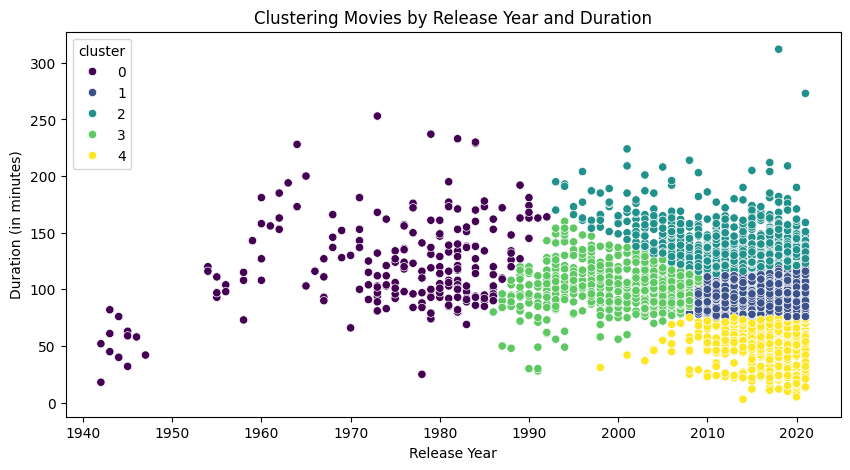

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

movies_df = df[df['type'] == 'Movie'].copy()

movies_df['duration'] = movies_df['duration'].str.replace(' min', '')
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')

imputer = SimpleImputer(strategy='median')
movies_df['duration'] = imputer.fit_transform(movies_df[['duration']])

clustering_df = movies_df[['release_year', 'duration']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_df)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
movies_df['cluster'] = clusters

plt.figure(figsize=(10, 5))
sns.scatterplot(data=movies_df, x='release_year', y='duration', hue='cluster', palette='viridis')
plt.title('Clustering Movies by Release Year and Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (in minutes)')
plt.show()

In [31]:
pip install wordcloud

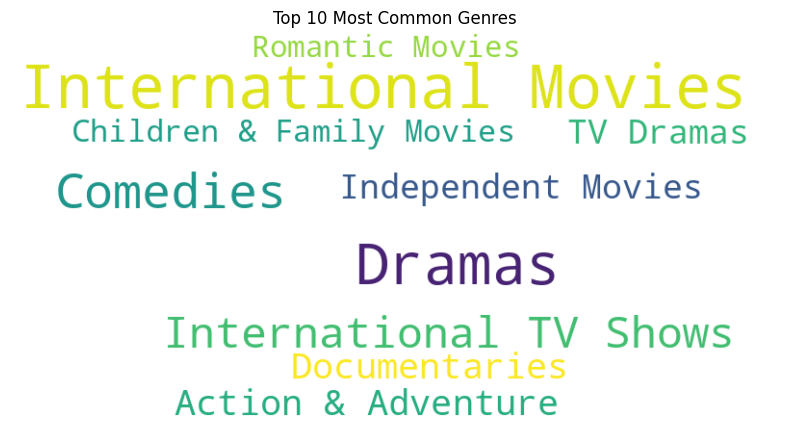

In [32]:
#Visualizing the most common genres in the Netflix dataset

from collections import Counter
from wordcloud import WordCloud

genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
common_genres = Counter(all_genres).most_common(10)

genres_dict = dict(common_genres)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(genres_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 10 Most Common Genres')
plt.axis('off')
plt.show()